In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
enrolments = pd.read_csv('../data/enrolments.csv')
enrolments.drop(columns='id', inplace=True)
enrolments.head(10)

,email,name,uid,branch,sem,course,category,period
0,shaun.dsouza@spit.ac.in,Shaun D'Souza,2021300031,COMP,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
1,ganesh.chaudhari@spit.ac.in,Ganesh Chaudhari,2021510007,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
2,chetan.dhandge@spit.ac.in,Chetan Dhandge,2021510010,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
3,sudhir.gomase@spit.ac.in,Sudhir Narayan Gomase,2021510018,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
4,vishal.padme@spit.ac.in,Vishal Devidas Padme,2021510041,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
5,pratik.parale@spit.ac.in,Pratik Parale,2021510045,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
6,amit.rathod@spit.ac.in,Amit Manohar Rathod,2021510053,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
7,sandesh.shivane@spit.ac.in,Sandesh Shivane,2021510063,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
8,prashant.singh2@spit.ac.in,Prashant Singh,2021510064,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
9,rahul.shinde@spit.ac.in,Rahul Pandharinath Shinde,2021600061,CSE-AIML,3,Basics of Fire Safety,Intellectual,ODD_SEM_22_23


In [3]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   email     5377 non-null   object
 1   name      5377 non-null   object
 2   uid       5377 non-null   int64 
 3   branch    5377 non-null   object
 4   sem       5377 non-null   int64 
 5   course    5377 non-null   object
 6   category  5377 non-null   object
 7   period    5377 non-null   object
dtypes: int64(2), object(6)
memory usage: 336.2+ KB


In [4]:
courses = pd.read_csv('../data/courses.csv')
courses.head(10)

,course_id,course_name,category
0,1,Art of living,Spiritual
1,2,Introduction to Bhagvadgita,Spiritual
2,3,Pranvidya,Spiritual
3,4,Yog Vidya,Spiritual
4,5,Mentoring School Children (Abhyudaya),Social
5,6,Mentorship to Juniors,Social
6,7,NSS,Social
7,8,Principle Centered Leadership,Social
8,9,Teaching Assistantship,Social
9,10,Terrace Gardening,Social


Graphs:

Overall popularity of categories according to total number of enrolments:

In [5]:
fig = px.pie(enrolments, names='category')
fig.update_layout(width=700, height=600)
fig.show()
# fig.update_layout(
#     plot_bgcolor="rgba(0, 0, 0, 0)",
#     paper_bgcolor="rgba(0, 0, 0, 0)",
#     font_color="white",
# )

In [6]:
df_grouped = enrolments.groupby(by='category').size().to_frame(name='count').reset_index().sort_values(by='count', ascending=False)
fig = px.bar(df_grouped, x='category', y='count', title='Count of Course Enrolments by Category')
fig.update_layout(xaxis_title='Category', yaxis_title='Count')
fig.update_layout(width=800, height=500)
fig.show()

In [7]:
df_grouped = courses.groupby(by='category').size().to_frame(name='count').reset_index().sort_values(by='count', ascending=False)
fig = px.bar(df_grouped, x='category', y='count', title='Count of Courses by Category')
fig.update_layout(xaxis_title='Category', yaxis_title='Count')
fig.update_layout(width=800, height=500)
fig.show()

Count of enrolments of a category popularized by number of courses in that category:

In [8]:
px.bar((enrolments.groupby(by='category').size() / courses.groupby(by='category').size()).to_frame(name='count').reset_index().sort_values(by='count', ascending=False), x='category', y='count', title='Count of enrolments normalized by number of courses')

In [9]:
x = enrolments.groupby(by="course").size().sort_values(ascending=True)
x.name = "Count of students"
x = pd.merge(
    x, courses, left_index=True, right_on="course_name"
).dropna().sort_values(by="Count of students", ascending=True)
x = x[x['Count of students'] > 0]
x.rename(columns={'course_name': 'Course'}, inplace=True)
fig = px.bar(x, x='Count of students', y='Course', orientation='h', color='category')
fig.update_layout(width=1100, height=800)

In [10]:
x = enrolments.groupby(by="course").size().sort_values(ascending=True)
x.name = "Count of students"
x = pd.merge(
    x, courses, left_index=True, right_on="course_name"
).dropna().sort_values(by="Count of students", ascending=True)
x = x[x['Count of students'] > 0]
x.rename(columns={'course_name': 'Course'}, inplace=True)
fig = px.bar(x, x='Count of students', y='Course', orientation='h')
fig.update_layout(width=1100, height=800)

Course Type Preferences Across Semesters:

In [11]:
df = enrolments.groupby(by=['period', 'category']).size().reset_index()
def fun(x):
    if x == 'EVEN_SEM_22_23':
        return 2
    if x == 'EVEN_SEM_23_24':
        return 4
    if x == 'ODD_SEM_22_23':
        return 1
    if x == 'ODD_SEM_23_24':
        return 3
    
def fun2(x):
    if x == 'Intellectual':
        return 0
    if x == 'Physical':
        return 1
    if x == 'Social':
        return 2
    if x == 'Spiritual':
        return 3
    if x == 'Emotional':
        return 4
df['x'] = df['period'].apply(fun)
df['y'] = df['category'].apply(fun2)
df.sort_values(by=['x', 'y'], inplace=True)

In [12]:
# df = enrolments.groupby(by=['period', 'category']).size().reset_index()
fig = px.bar(df, x='period', y=0, color='category', barmode='stack')
fig.update_layout(title='Enrolment by Course Type over Semesters', xaxis_title='Semester', yaxis_title='Enrollment Count')
fig.update_layout(width=800, height=600)
fig.show()

In [13]:
x = enrolments.groupby('uid')
y = x.size()[x.size() == 4].index
y

Index([2020100001, 2020100003, 2020100007, 2020100008, 2020100010, 2020100011,
       2020100015, 2020100017, 2020100018, 2020100019,
       ...
       2021700066, 2021700067, 2021700068, 2021700069, 2021700071, 2021700072,
       2022200008, 2022200126, 2022600012, 2022601008],
      dtype='int64', name='uid', length=455)

In [14]:
df = enrolments.groupby(by=['period', 'category']).size().reset_index()
def fun(x):
    if x == 'EVEN_SEM_22_23':
        return 2
    if x == 'EVEN_SEM_23_24':
        return 4
    if x == 'ODD_SEM_22_23':
        return 1
    if x == 'ODD_SEM_23_24':
        return 3
    
def fun2(x):
    if x == 'Intellectual':
        return 0
    if x == 'Physical':
        return 1
    if x == 'Social':
        return 2
    if x == 'Spiritual':
        return 3
    if x == 'Emotional':
        return 4
df['x'] = df['period'].apply(fun)
df['y'] = df['category'].apply(fun2)
df.sort_values(by=['x', 'y'], inplace=True)

In [15]:
enrolments.groupby(by=['period', 'category']).size().reset_index()

,period,category,0
0,EVEN_SEM_22_23,Emotional,42
1,EVEN_SEM_22_23,Intellectual,631
2,EVEN_SEM_22_23,Physical,276
3,EVEN_SEM_22_23,Social,148
4,EVEN_SEM_22_23,Spiritual,15
5,EVEN_SEM_23_24,Emotional,31
6,EVEN_SEM_23_24,Intellectual,630
7,EVEN_SEM_23_24,Physical,761
8,EVEN_SEM_23_24,Social,164
9,EVEN_SEM_23_24,Spiritual,143


In [16]:
enrolments.groupby(by='category').size() 

category
Emotional        252
Intellectual    2552
Physical        1479
Social           801
Spiritual        293
dtype: int64

In [17]:
courses.groupby(by='category').size()

category
Emotional        3
Intellectual    15
Physical        11
Social           9
Spiritual        4
dtype: int64

In [20]:
enrolments.groupby(by='category').size().reset_index() / courses.groupby(by='category').size()

,0,Emotional,Intellectual,Physical,Social,Spiritual,category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
enrolments.groupby('category')['uid'].count() 

category
Emotional        252
Intellectual    2552
Physical        1479
Social           801
Spiritual        293
Name: uid, dtype: int64

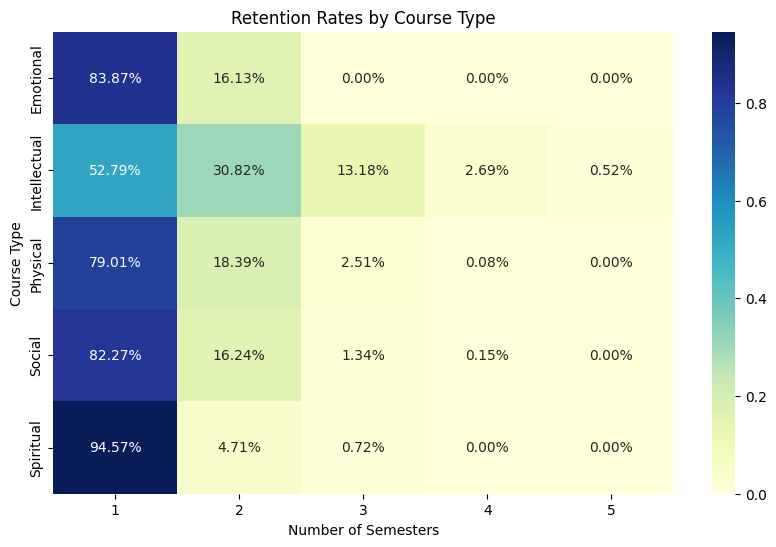

In [22]:
retention_rates = enrolments.groupby(["uid", "category"])["period"].size().reset_index()
retention_rates = (
    retention_rates.groupby("category")["period"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
plt.figure(figsize=(10, 6))
sns.heatmap(retention_rates, annot=True, cmap="YlGnBu", fmt=".2%", cbar=True)
plt.title("Retention Rates by Course Type")
plt.xlabel("Number of Semesters")
plt.ylabel("Course Type")
plt.show()

In [23]:
enrolments = pd.read_csv('../data/enrolments.csv')
enrolments.drop(columns='id', inplace=True)
enrolments.head(10)

,email,name,uid,branch,sem,course,category,period
0,shaun.dsouza@spit.ac.in,Shaun D'Souza,2021300031,COMP,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
1,ganesh.chaudhari@spit.ac.in,Ganesh Chaudhari,2021510007,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
2,chetan.dhandge@spit.ac.in,Chetan Dhandge,2021510010,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
3,sudhir.gomase@spit.ac.in,Sudhir Narayan Gomase,2021510018,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
4,vishal.padme@spit.ac.in,Vishal Devidas Padme,2021510041,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
5,pratik.parale@spit.ac.in,Pratik Parale,2021510045,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
6,amit.rathod@spit.ac.in,Amit Manohar Rathod,2021510053,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
7,sandesh.shivane@spit.ac.in,Sandesh Shivane,2021510063,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
8,prashant.singh2@spit.ac.in,Prashant Singh,2021510064,MCA,1,Basics of Fire Safety,Intellectual,ODD_SEM_22_23
9,rahul.shinde@spit.ac.in,Rahul Pandharinath Shinde,2021600061,CSE-AIML,3,Basics of Fire Safety,Intellectual,ODD_SEM_22_23


In [24]:
courses = pd.read_csv('../data/courses.csv')
courses.head(10)

,course_id,course_name,category
0,1,Art of living,Spiritual
1,2,Introduction to Bhagvadgita,Spiritual
2,3,Pranvidya,Spiritual
3,4,Yog Vidya,Spiritual
4,5,Mentoring School Children (Abhyudaya),Social
5,6,Mentorship to Juniors,Social
6,7,NSS,Social
7,8,Principle Centered Leadership,Social
8,9,Teaching Assistantship,Social
9,10,Terrace Gardening,Social


Overall popularity of categories according to total number of enrolments:

In [25]:
df_grouped = enrolments.groupby(by='category').size().to_frame(name='count').reset_index().sort_values(by='count', ascending=False)
fig = px.bar(df_grouped, x='category', y='count', title='Count of Course Enrolments by Category')
fig.update_layout(xaxis_title='Category', yaxis_title='Count')
fig.update_layout(width=800, height=500)
fig.show()

Count of enrolments of a category popularized by number of courses in that category:

In [26]:
x = enrolments.groupby(by="course").size().sort_values(ascending=True)
x.name = "Count of students"
x = pd.merge(
    x, courses, left_index=True, right_on="course_name"
).dropna().sort_values(by="Count of students", ascending=True)
x = x[x['Count of students'] > 0]
x.rename(columns={'course_name': 'Course'}, inplace=True)
fig = px.bar(x, x='Count of students', y='Course', orientation='h', color='category')
fig.update_layout(width=1100, height=800)

Course Type Preferences Across Semesters:

In [ ]:
# df = enrolments.groupby(by=['period', 'category']).size().reset_index()
fig = px.bar(df, x='period', y=0, color='category', barmode='stack')
fig.update_layout(title='Enrolment by Course Type over Semesters', xaxis_title='Semester', yaxis_title='Enrollment Count')
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
x = enrolments.groupby('uid')
y = x.size()[x.size() == 4].index
y

Index([2020100001, 2020100003, 2020100007, 2020100008, 2020100010, 2020100011,
       2020100015, 2020100017, 2020100018, 2020100019,
       ...
       2021700066, 2021700067, 2021700068, 2021700069, 2021700071, 2021700072,
       2022200008, 2022200126, 2022600012, 2022601008],
      dtype='int64', name='uid', length=455)

In [ ]:
df = enrolments.groupby(by=['period', 'category']).size().reset_index()
def fun(x):
    if x == 'EVEN_SEM_22_23':
        return 2
    if x == 'EVEN_SEM_23_24':
        return 4
    if x == 'ODD_SEM_22_23':
        return 1
    if x == 'ODD_SEM_23_24':
        return 3
    
def fun2(x):
    if x == 'Intellectual':
        return 0
    if x == 'Physical':
        return 1
    if x == 'Social':
        return 2
    if x == 'Spiritual':
        return 3
    if x == 'Emotional':
        return 4
df['x'] = df['period'].apply(fun)
df['y'] = df['category'].apply(fun2)
df.sort_values(by=['x', 'y'], inplace=True)

In [ ]:
enrolments.groupby(by=['period', 'category']).size().reset_index()

,period,category,0
0,EVEN_SEM_22_23,Emotional,42
1,EVEN_SEM_22_23,Intellectual,631
2,EVEN_SEM_22_23,Physical,276
3,EVEN_SEM_22_23,Social,148
4,EVEN_SEM_22_23,Spiritual,15
5,EVEN_SEM_23_24,Emotional,31
6,EVEN_SEM_23_24,Intellectual,630
7,EVEN_SEM_23_24,Physical,761
8,EVEN_SEM_23_24,Social,164
9,EVEN_SEM_23_24,Spiritual,143


In [ ]:
enrolments.groupby(by='category').size() 

category
Emotional        252
Intellectual    2552
Physical        1479
Social           801
Spiritual        293
dtype: int64

In [ ]:
courses.groupby(by='category').size()

category
Emotional        3
Intellectual    15
Physical        11
Social           9
Spiritual        4
dtype: int64

In [ ]:
enrolments.groupby(by='category').size().to_frame(name='count').reset_index() / courses.groupby(by='category').size().to_frame(name='count').reset_index()

NameError: name 'courses' is not defined

In [ ]:
enrolments.groupby('category')['uid'].count() 

category
Emotional        252
Intellectual    2552
Physical        1479
Social           801
Spiritual        293
Name: uid, dtype: int64

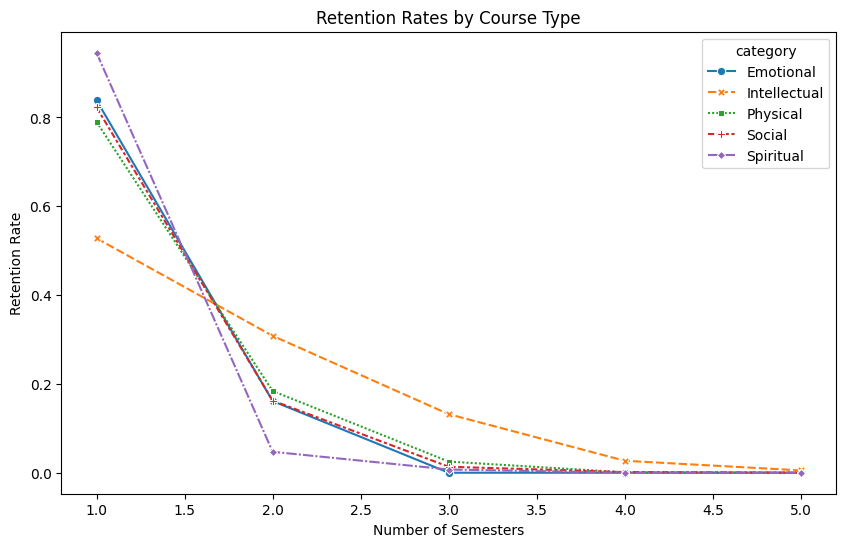

In [27]:
retention_rates = enrolments.groupby(["uid", "category"])["period"].size().reset_index()
retention_rates = (
    retention_rates.groupby("category")["period"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# make a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=retention_rates.T, markers=True)
plt.title("Retention Rates by Course Type")
plt.xlabel("Number of Semesters")
plt.ylabel("Retention Rate")
plt.show()